In [1]:
%cd C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\extras

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\extras


In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Download a text dataset
Let's start by download a text dataset. We'll be using the Real or Not? dataset from Kaggle which contains text-based Tweets about natural disasters.

The Real Tweets are actually about disasters, for example:

Jetstar and Virgin forced to cancel Bali flights again because of ash from Mount Raung volcano
The Not Real Tweets are Tweets not about disasters (they can be on anything), for example:

'Education is the most powerful weapon which you can use to change the world.' Nelson #Mandela #quote
For convenience, the dataset has been downloaded from Kaggle (doing this requires a Kaggle account) and uploaded as a downloadable zip file.

🔑 Note: The original downloaded data has not been altered to how you would download it from Kaggle.

Visualizing a text dataset
Once you've acquired a new dataset to work with, what should you do first?

Explore it? Inspect it? Verify it? Become one with it?

All correct.

Remember the motto: visualize, visualize, visualize.

Right now, our text data samples are in the form of .csv files. For an easy way to make them visual, let's turn them into pandas DataFrame's.

📖 Reading: You might come across text datasets in many different formats. Aside from CSV files (what we're working with), you'll probably encounter .txt files and .json files too. For working with these type of files, I'd recommend reading the two following articles by RealPython:

How to Read and Write Files in Python
Working with JSON Data in Python

In [3]:
%cd C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\nlp_getting_started

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\nlp_getting_started


In [4]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [6]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# what does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# how many examples of each class
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
# How many total samples
len(train_df) , len(test_df)

(7613, 3263)

In [10]:
import random
random_index = random.randint(0,len(train_df)-5)
random_index
for row in train_df_shuffled[["text","target"]][random_index : random_index+5].itertuples():
    _,text,target = row
    print(f"Target:{target}","(real disaster)" if target>0 else "(Not a disaster)")
    print(f"Text : {text}")


Target:1 (real disaster)
Text : @AlfaPedia It might have come out ONLY too burst as a Bomb making him suicide bomber
Target:0 (Not a disaster)
Text : Biolab safety concerns grow: FedEx stops transporting certain specimens. Research facilities 'dumbfounded' by action. http://t.co/RUjV4VPnBV
Target:1 (real disaster)
Text : #Jackson #ms Longest Streak of Triple-Digit Heat Since 2013 Forecast in Dallas http://t.co/Ih0Awv3L1O
Target:1 (real disaster)
Text : Oh the usual. Mass murder and world domination plans over coffee. How's your day going?
Target:1 (real disaster)
Text : Thunder pounds north goes black
a deep bruise on the sky's chest
wind cries its pain.  
A summer storm has a tough life
short violent.


Split data into training and validation sets
Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.

When our model trains (tries patterns in the Tweet samples), it'll only see data from the training set and we can see how it performs on unseen data using the validation set.

We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

To split our training dataset and create a validation dataset, we'll use Scikit-Learn's train_test_split() method and dedicate 10% of the training samples to the validation set.

In [11]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                         train_df_shuffled['target'].to_numpy(),
                                                                        test_size=0.1,
                                                                        random_state = 42)

In [12]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [13]:
len(train_df_shuffled)

7613

In [14]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# converting text into numbers

Wonderful! We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (0 and 1) but our Tweets are in string form.

🤔 Question: What do you think we have to do before we can use a machine learning algorithm with our text data?

If you answered something along the lines of "turn it into numbers", you're correct. A machine learning algorithm requires its inputs to be in numerical form.

In NLP, there are two main concepts for turning text into numbers:

Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

Question: What level of tokenzation should I use? What embedding should should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using tf.keras.layers.concatenate).

If you're looking for pre-trained word embeddings, Word2vec embeddings, GloVe embeddings and many of the options available on TensorFlow Hub are great places to start.

🔑 Note: Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

Text vectorization (tokenization)
Enough talking about tokenization and embeddings, let's create some.

We'll practice tokenzation (mapping our words to numbers) first.

To tokenize our words, we'll use the helpful preprocessing layer tf.keras.layers.experimental.preprocessing.TextVectorization.

The TextVectorization layer takes the following parameters:

max_tokens - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
standardize - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
split - How to split text, default is "whitespace" which splits on spaces.
ngrams - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.
Let's see it in action.

#Text Vectorization (Tokenization)

In [15]:
from tensorflow.keras.layers import TextVectorization

In [16]:
# Use the default textvectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    )

In [17]:
# find the average number of token (words) in each training tweets
len(train_sentences[0].split())

7

In [18]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [19]:
# set up text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

In [20]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [21]:
#Fit the text vectorizer to the training text

text_vectorizer.adapt(train_sentences)

In [22]:
#  create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [23]:
# choosing a ramdom text from the training dataset and tokenizing it
random_sentence = random.choice(train_sentences)
print(f"Original sentence:\n{random_sentence}\ \n\n Vectorized sentence:")
text_vectorizer([random_sentence])

Original sentence:
Lava cakes are my fav.\ 

 Vectorized sentence:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 434, 4042,   22,   13, 2460,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]], dtype=int64)>

In [24]:
# Get the Unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in the training sentences
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f"No of words in vocab : {len(words_in_vocab)}")
print(f"Top 5 words in vocab : {top_5_words}")
print(f"Bottom 5 words in vocab : {bottom_5_words}")

No of words in vocab : 10000
Top 5 words in vocab : ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words in vocab : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Creating an Embedding using an Embedding Layer
We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
input_length - Length of sequences being passed to embedding layer.
Knowing these, let's make an embedding layer.

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [26]:
# Get a random sentence from the training set

random_sentence = random.choice(train_sentences)

print(f"Original sentence : {random_sentence}")
print(f"embedded sentence :\n\n\n")
print(embedding(text_vectorizer([random_sentence])))
sample_embed = embedding(text_vectorizer([random_sentence]))

Original sentence : Watch Sarah Palin OBLITERATE Planned Parenthood For Targeting Minority Women! ÛÒ BB4SP http://t.co/fqMYprlG9g
embedded sentence :



tf.Tensor(
[[[ 0.03204352  0.02600405  0.02502772 ... -0.03915702  0.00398188
    0.02555063]
  [-0.00170773 -0.03954647  0.02853826 ... -0.01677402  0.03981349
    0.04551569]
  [-0.04065826 -0.0277945   0.02277363 ...  0.01409728 -0.01121712
    0.02557066]
  ...
  [-0.03770454  0.00630587 -0.03229839 ...  0.03401829 -0.03831951
    0.03297985]
  [-0.00943553  0.008265    0.02213508 ... -0.02279924  0.04281567
   -0.01828756]
  [-0.00943553  0.008265    0.02213508 ... -0.02279924  0.04281567
   -0.01828756]]], shape=(1, 15, 128), dtype=float32)


In [27]:
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 3.20435204e-02,  2.60040499e-02,  2.50277184e-02, -3.38610187e-02,
         2.33295448e-02,  3.82929929e-02, -1.45997852e-03, -4.51807864e-02,
        -8.49484280e-03,  2.85730697e-02, -3.71100791e-02, -3.12256571e-02,
        -1.78190582e-02,  2.89541148e-02, -4.54760306e-02,  2.21235268e-02,
         4.27594222e-02, -3.98856178e-02, -1.22154132e-02, -3.90384682e-02,
        -3.44992802e-03,  3.07052173e-02,  6.33120537e-04, -4.36305068e-02,
        -3.83145921e-02, -2.26151478e-02, -2.05292832e-02,  1.79346688e-02,
        -3.69387157e-02, -4.14895043e-02, -3.53872888e-02, -4.43501957e-02,
         3.82084139e-02,  2.08706371e-02, -4.57028635e-02,  7.02825934e-03,
         3.59317400e-02,  2.05500461e-02, -2.89800651e-02, -5.39467484e-03,
         4.21268679e-02, -8.79500061e-03, -2.30209362e-02, -2.98000108e-02,
         2.15037726e-02, -1.20904334e-02,  2.54702680e-02, -4.98976484e-02,
        -1.07505545e-02, -5.75644895e-0

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

Model 0: Naive Bayes (baseline)
Model 1: Feed-forward neural network (dense model)
Model 2: LSTM model
Model 3: GRU model
Model 4: Bidirectional-LSTM model
Model 5: 1D Convolutional Neural Network
Model 6: TensorFlow Hub Pretrained Feature Extractor
Model 7: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:

Construct the model
Train the model
Make predictions with the model
Track prediction evaluation metrics for later comparison
Let's get started.

Model 0: Getting a baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

📖 Reading: The ins and outs of TF-IDF algorithm is beyond the scope of this notebook, however, the curious reader is encouraged to check out the Scikit-Learn documentation for more.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib

#Create tokenisation and modelling pipeline
model_0 = Pipeline([
                   ("tfidf",TfidfVectorizer()), # convert word to numbers
                   ("clf",MultinomialNB()), #model the text
])

#Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# evaluate our baseline model
baseline_score =  model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of : {baseline_score*100 : .2f}%")

Our baseline model achieves an accuracy of :  79.27%


In [30]:
#make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

Creating an evaluation function for our model experiments
We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

Accuracy
Precision
Recall
F1-score
🔑 Note: Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [31]:
#function to evaluate : accuracy, precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
    """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    #calculate model_accuracy
    model_accuracy = accuracy_score(y_true,y_pred)*100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average = "weighted")
    model_results = {"accuracy" : model_accuracy,
                     "precision" : model_precision,
                     "recall" : model_recall,
                     "f1" : model_f1}
    return model_results
    
    

In [32]:
#get baseline results
baseline_results = calculate_results(y_true = val_labels,y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [33]:
#Model 1 : A simple dense model

The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [34]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [35]:
import tensorflow as tf
# build model with the functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs,name = "model_1_dense")

In [36]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [38]:
# fit the model
model_1.history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs =5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                              experiment_name = "model_1_dense")]
                             )

Saving TensorBoard log files to: model_logs/model_1_dense/20250131-121709
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6544 - loss: 0.6457 - val_accuracy: 0.7598 - val_loss: 0.5329
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8135 - loss: 0.4573 - val_accuracy: 0.7887 - val_loss: 0.4747
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8586 - loss: 0.3529 - val_accuracy: 0.7874 - val_loss: 0.4568
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8950 - loss: 0.2892 - val_accuracy: 0.7848 - val_loss: 0.4693
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9145 - loss: 0.2353 - val_accuracy: 0.7795 - val_loss: 0.4829


In [39]:
# check the results
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.5162 


[0.4829213321208954, 0.7795275449752808]

In [40]:
#madke some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[3.04525346e-01],
       [6.53602839e-01],
       [9.97932315e-01],
       [1.29366219e-01],
       [1.09585226e-01],
       [9.35161471e-01],
       [9.11056042e-01],
       [9.94760215e-01],
       [9.58757877e-01],
       [3.05146515e-01],
       [1.26537889e-01],
       [6.79537117e-01],
       [3.64572406e-02],
       [2.03405023e-01],
       [4.99865506e-03],
       [1.28243253e-01],
       [3.62590924e-02],
       [6.38950542e-02],
       [2.38883123e-01],
       [4.77170438e-01],
       [8.92997503e-01],
       [3.62592414e-02],
       [4.14779127e-01],
       [8.28819051e-02],
       [9.59503293e-01],
       [9.98831749e-01],
       [4.31253202e-02],
       [5.74651733e-02],
       [2.09483299e-02],
       [1.98297232e-01],
       [5.27542591e-01],
       [2.75271237e-01],
       [5.08302271e-01],
       [1.74367040e-01],
       [4.89338696e-01],
       [6.33304641e-02],
       [9.94856954e-01],
       [1.61568552e-01],
       [3.48246247e-02],
       [9.98557866e-01],


In [41]:
model_1_pred_probs.shape

(762, 1)

In [42]:
# look at the single prediction
model_1_pred_probs[0]

array([0.30452535], dtype=float32)

In [43]:
# look at the first 10 prediction
model_1_pred_probs[:10]

array([[0.30452535],
       [0.65360284],
       [0.9979323 ],
       [0.12936622],
       [0.10958523],
       [0.9351615 ],
       [0.91105604],
       [0.9947602 ],
       [0.9587579 ],
       [0.30514652]], dtype=float32)

In [44]:
# convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [45]:
# calculate our model_1 results
model_1_results = calculate_results(y_true = val_labels,y_pred = model_1_preds)
model_1_results

{'accuracy': 77.95275590551181,
 'precision': 0.7854389051990907,
 'recall': 0.7795275590551181,
 'f1': 0.7759572947489844}

In [46]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [47]:
import numpy as np
np.array(list(model_1_results)) > np.array(list(baseline_results))

array([False, False, False, False])

# Visualising learned embeddings

Our first model (model_1) contained an embedding layer (embedding) which learned a way of representing words as feature vectors by passing over the training data.

Hearing this for the first few times may sound confusing.

So to further help understand what a text embedding is, let's visualize the embedding our model learned.

To do so, let's remind ourselves of the words in our vocabulary.

In [48]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:20]

(10000,
 ['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with',
  'it',
  'that',
  'at',
  'by',
  'this'])

In [49]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [50]:
# get the weight matrix of the embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights
print(embed_weights.shape)

(10000, 128)


Now we've got these two objects, we can use the Embedding Projector tool to visualize our embedding.

To use the Embedding Projector tool, we need two files:

The embedding vectors (same as embedding weights).
The meta data of the embedding vectors (the words they represent - our vocabulary).
Right now, we've got of these files as Python objects. To download them to file, we're going to use the code example available on the TensorFlow word embeddings tutorial page.

In [51]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [52]:
%pwd
%cd C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics


In [53]:
import io

# Open files in write mode
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# Write some example data
out_v.write("vector_data\n")
out_m.write("metadata_data\n")

# Close the files to ensure data is saved
out_v.close()
out_m.close()

print("Files have been written to the local machine.")


Files have been written to the local machine.


# RECURRENT NEURAL NETWORKS

For our next series of modelling experiments we're going to be using a special kind of neural network called a Recurrent Neural Network (RNN).

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word dog.

See what happened there?

I put the word "dog" at the end which is a valid word but it doesn't make sense in the context of the rest of the sentence.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

For a simple example, take two sentences:

Massive earthquake last week, no?
No massive earthquake last week.
Both contain exactly the same words but have different meaning. The order of the words determines the meaning (one could argue punctuation marks also dictate the meaning but for simplicity sake, let's stay focused on the words).

Recurrent neural networks can be used for a number of sequence-based problems:

One to one: one input, one output, such as image classification.
One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).
When you come across RNN's in the wild, you'll most likely come across variants of the following:

Long short-term memory cells (LSTMs).
Gated recurrent units (GRUs).
Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).
Going into the details of each these is beyond the scope of this notebook (we're going to focus on using them instead), the main thing you should know for now is that they've proven very effective at modelling sequences.

For a deeper understanding of what's happening behind the scenes of the code we're about to write, I'd recommend the following resources:

📖 Resources:

MIT Deep Learning Lecture on Recurrent Neural Networks - explains the background of recurrent neural networks and introduces LSTMs.
The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.
Understanding LSTMs by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.
Model 2: LSTM
With all this talk of what RNN's are and what they're good for, I'm sure you're eager to build one.

We're going to start with an LSTM-powered RNN.

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use tensorflow.keras.layers.LSTM().

Coloured block example of the structure of an recurrent neural network.

Our model is going to take on a very similar structure to model_1:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer (model_2_embedding) for our model. The text_vectorizer layer can be reused since it doesn't get updated during training.

🔑 Note: The reason we use a new embedding layer for each model is since the embedding layer is a learned representation of words (as numbers), if we were to use the same embedding layer (embedding_1) for each model, we'd be mixing what one model learned with the next. And because we want to compare our models later on, starting them with their own embedding layer each time is a better idea.

In [54]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.LSTM(64,return_sequences = True)(x)
x = layers.LSTM(64)(x)
#x = layers.Dense(64,activation = "relu")(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name = "model_2_LSTM")

In [55]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [56]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_2.history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"LSTM")]
                             )

Saving TensorBoard log files to: model_logs/LSTM/20250131-121738
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9093 - loss: 0.2875 - val_accuracy: 0.7848 - val_loss: 0.5902
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9436 - loss: 0.1506 - val_accuracy: 0.7769 - val_loss: 0.5587
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9522 - loss: 0.1243 - val_accuracy: 0.7743 - val_loss: 0.7078
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9604 - loss: 0.1001 - val_accuracy: 0.7743 - val_loss: 0.8935
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9694 - loss: 0.0849 - val_accuracy: 0.7730 - val_loss: 1.0094


In [58]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape,model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


((762, 1),
 array([[8.0895508e-03],
        [7.0126617e-01],
        [9.9985790e-01],
        [3.7012964e-02],
        [7.4822264e-04],
        [9.9973351e-01],
        [8.1964040e-01],
        [9.9989074e-01],
        [9.9985862e-01],
        [6.0384899e-01]], dtype=float32))

In [59]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [60]:
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7740517401498704,
 'recall': 0.7729658792650919,
 'f1': 0.7712160418848196}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

> 📖 **Resource:** A full explanation of the GRU cell is beyond the scope of this noteook but I'd suggest the following resources to learn more:
* [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) Wikipedia page
* [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) by Simeon Kostadinov

To use the GRU cell in TensorFlow, we can call the [`tensorflow.keras.layers.GRU()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) class.

The architecture of the GRU-powered model will follow the same structure we've been using:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Again, the only difference will be the layer(s) we use between the embedding and the output.

In [61]:
# Building an RNN using GRU cell

from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
#x = layers.GRU(64,return_sequences = True)(x)
#print(x.shape)
#x = layers.LSTM(42)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.GlobalAvgPool1D()(x)

#x = layers.Dense(64,activation = "relu")(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name = "model_3_GRU")


(None, 15, 128)


In [62]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# compile the model
model_3.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [64]:
#fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = [val_sentences,val_labels],
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20250131-121811
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8831 - loss: 0.2714 - val_accuracy: 0.7743 - val_loss: 0.7388
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9716 - loss: 0.0801 - val_accuracy: 0.7743 - val_loss: 0.8251
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9751 - loss: 0.0649 - val_accuracy: 0.7808 - val_loss: 0.9252
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9778 - loss: 0.0560 - val_accuracy: 0.7782 - val_loss: 1.1236
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9778 - loss: 0.0533 - val_accuracy: 0.7769 - val_loss: 1.0088


In [65]:
# This model summary was created based on experimentation done around Global average pooling
#ONLY FOR TESTING PURPOSE TO MAKE UNDERSTAND THE CONCEPT OF Globalaveragepooling


from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.GRU(64)(x)
x = layers.GRU(64,return_sequences = True)(x)
#print(x.shape)
#x = layers.LSTM(42)(x)
print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
x = layers.GlobalAvgPool1D()(x)
print(x.shape)
x = layers.Dense(64,activation = "relu")(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name = "model_3_GRU")


model_3.summary()

(None, 15, 128)
(None, 15, 64)
(None, 64)


Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 15, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,473 (5.04 MB)

 Trainable params: 1,321,473 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#making some predictions using our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


array([[0.49819323],
       [0.49914476],
       [0.4898858 ],
       [0.5009931 ],
       [0.4999205 ],
       [0.4964822 ],
       [0.499866  ],
       [0.4864669 ],
       [0.48554185],
       [0.50167626]], dtype=float32)

In [67]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [68]:
#calculate model 3 results
model_3_results = calculate_results(y_true = val_labels,
                                     y_pred = model_3_preds)

In [69]:
model_3_results

{'accuracy': 36.61417322834646,
 'precision': 0.3413297197701037,
 'recall': 0.3661417322834646,
 'f1': 0.3486647893683079}

Model 4: Bidirectonal RNN model
Look at us go! We've already built two RNN's with GRU and LSTM cells. Now we're going to look into another kind of RNN, the bidirectional RNN.

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

Okay enough talk, let's build a bidirectional RNN.

Once again, TensorFlow helps us out by providing the tensorflow.keras.layers.Bidirectional class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional.

In [70]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.Bidirectional(layers.LSTM(64,return_sequences =  True))(x)
print(x.shape)
#x = layers.GlobalAvgPool1D()(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
#print(x.shape)
#x = layers.Dense(64,activation = "relu")(x)
print(x.shape)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name = "model_4_bidirectional")

(None, 15, 128)
(None, 128)


In [71]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
#compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [73]:
model_4.history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks =[create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20250131-121845
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9435 - loss: 0.1929 - val_accuracy: 0.7730 - val_loss: 0.9330
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9729 - loss: 0.0620 - val_accuracy: 0.7743 - val_loss: 1.1629
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9758 - loss: 0.0556 - val_accuracy: 0.7782 - val_loss: 1.4168
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9773 - loss: 0.0482 - val_accuracy: 0.7677 - val_loss: 1.3455
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9791 - loss: 0.0430 - val_accuracy: 0.7717 - val_loss: 1.4129


In [74]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[4.8786364e-03],
       [6.0568488e-01],
       [9.9996537e-01],
       [1.0107571e-01],
       [1.8262690e-05],
       [9.9966681e-01],
       [9.6888846e-01],
       [9.9998373e-01],
       [9.9997669e-01],
       [9.9579465e-01]], dtype=float32)

In [75]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [76]:
# calculate the results of the bidirectional model
model_4_results =calculate_results(y_true = val_labels,y_pred = model_4_preds)
model_4_results

{'accuracy': 77.16535433070865,
 'precision': 0.7715668446582516,
 'recall': 0.7716535433070866,
 'f1': 0.7706989403422687}

Convolutional Neural Networks for Text
You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
You might be thinking "that just looks like the architecture layout we've been using for the other models..."

And you'd be right.

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a tensorflow.keras.layers.Conv1D() layer followed by a tensorflow.keras.layers.GlobablMaxPool1D() layer.

📖 Resource: The intuition here is explained succinctly in the paper Understanding Convolutional Neural Networks for Text Classification, where they state that CNNs classify text through the following steps:

1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
Max-pooling over time extracts the relevant ngrams for making a decision.
The rest of the network classifies the text based on this information.
Model 5: Conv1D
Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a temporal convolution) in action.

We'll first create an embedding of a sample of text and experiment passing it through a Conv1D() layer and GlobalMaxPool1D() layer.

In [77]:
# Test out our embedding layer, conv 1D layer and maxpool layer (Using padding as same)
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides = 1,
                        padding = "same",
                        activation = "relu"
                        )

conv_1d_output = conv_1d(embedding_test)

max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [78]:
# Test out our embedding layer, conv 1D layer and maxpool layer (Using padding as valid)

from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides = 1,
                        padding = "valid",
                        activation = "relu"
                        )

conv_1d_output = conv_1d(embedding_test)

max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [79]:
# Create  1D - convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape =(1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,kernel_size = 5,strides =1,padding = "valid",activation = "relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name = "model_5_Conv1D")

In [80]:
# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [81]:
model_5.summary()

Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 11, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,089 (5.04 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20250131-121923
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9428 - loss: 0.1868 - val_accuracy: 0.7664 - val_loss: 0.8833
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9704 - loss: 0.0779 - val_accuracy: 0.7677 - val_loss: 1.0469
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9776 - loss: 0.0580 - val_accuracy: 0.7572 - val_loss: 1.1740
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9822 - loss: 0.0463 - val_accuracy: 0.7493 - val_loss: 1.2156
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9776 - loss: 0.0481 - val_accuracy: 0.7625 - val_loss: 1.3142


In [83]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[2.1784661e-02],
       [8.1464309e-01],
       [9.9984056e-01],
       [4.9385604e-02],
       [2.8755642e-09],
       [9.8555809e-01],
       [8.3868128e-01],
       [9.9989754e-01],
       [9.9999869e-01],
       [9.0233696e-01]], dtype=float32)

In [84]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [85]:
model_5_results = calculate_results(y_true = val_labels,y_pred = model_5_pred)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7661237980682454,
 'recall': 0.7624671916010499,
 'f1': 0.7592074612720654}

In [86]:
#pip install tensorflow_hub
#!pip install tensorflow_hub

In [87]:
#import tensorflow_hub as hub

In [88]:
#pip install --upgrade tensorflow

In [89]:
all_model_results = pd.DataFrame({"0_baseline" : baseline_results,
                                  "1_simple_dense" : model_1_results,
                                  "2_lstm" : model_2_results,
                                  "3_gru" : model_3_results,
                                  "4_bidirectional" : model_4_results,
                                  "5_conv1D" : model_5_results})

all_model_results

,0_baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1D
accuracy,79.265092,77.952756,77.296588,36.614173,77.165354,76.246719
precision,0.811139,0.785439,0.774052,0.341330,0.771567,0.766124
recall,0.792651,0.779528,0.772966,0.366142,0.771654,0.762467
f1,0.786219,0.775957,0.771216,0.348665,0.770699,0.759207


In [90]:
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,77.952756,0.785439,0.779528,0.775957
2_lstm,77.296588,0.774052,0.772966,0.771216
3_gru,36.614173,0.341330,0.366142,0.348665
4_bidirectional,77.165354,0.771567,0.771654,0.770699
5_conv1D,76.246719,0.766124,0.762467,0.759207


In [91]:
all_model_results['accuracy'] = all_model_results['accuracy']/100

In [92]:
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.779528,0.785439,0.779528,0.775957
2_lstm,0.772966,0.774052,0.772966,0.771216
3_gru,0.366142,0.341330,0.366142,0.348665
4_bidirectional,0.771654,0.771567,0.771654,0.770699
5_conv1D,0.762467,0.766124,0.762467,0.759207


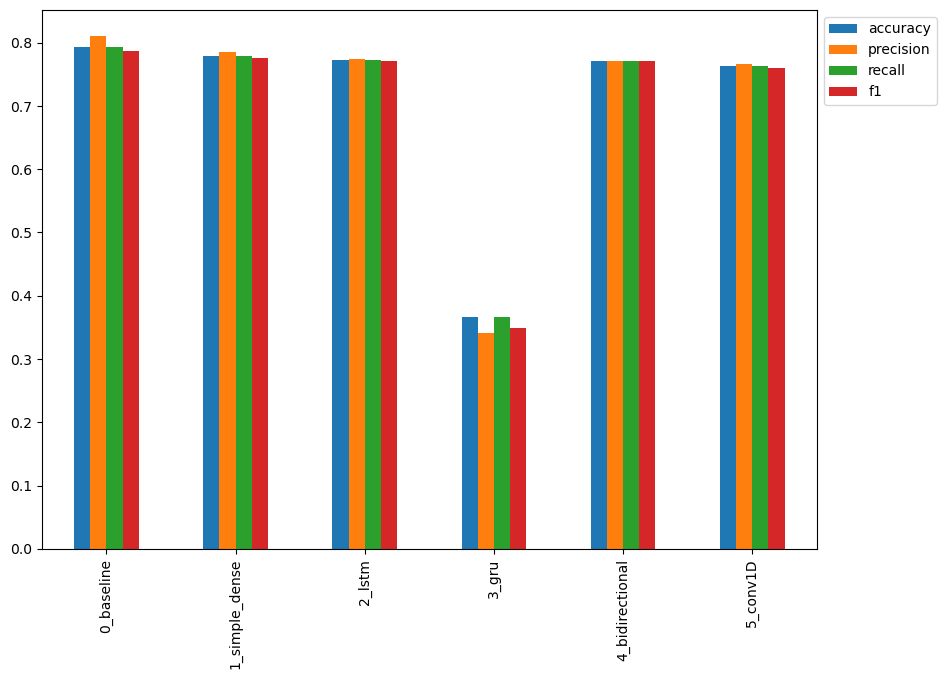

In [93]:
all_model_results.plot(kind = "bar",figsize = (10,7)).legend(bbox_to_anchor = (1.0,1.0))

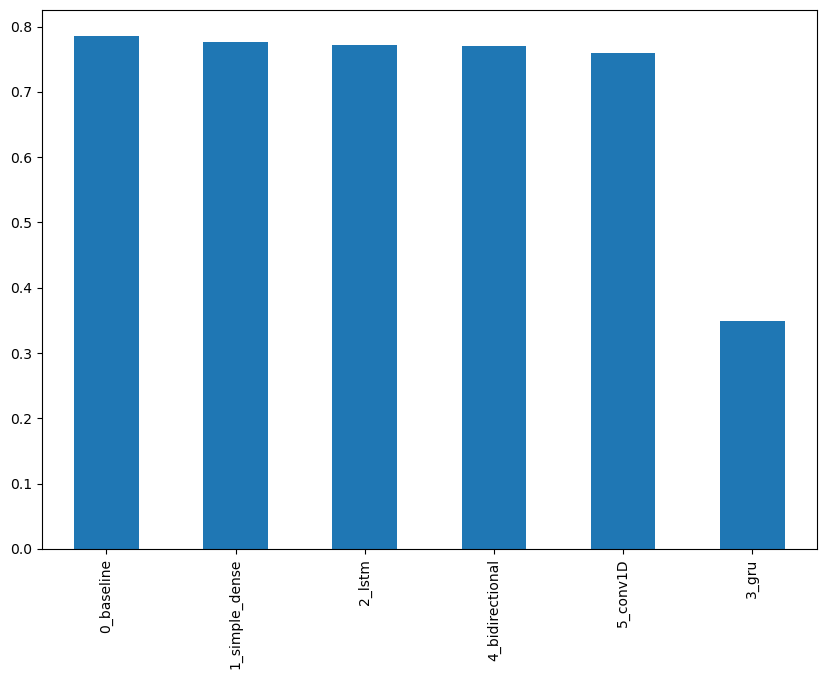

In [94]:
all_model_results.sort_values("f1",ascending = False)['f1'].plot(kind="bar",figsize = (10,7));

In [95]:
#Uploading our model training logs to Tensorboard.dev

#we can further inspect our modl's https://tensorboard.dev

In [96]:
#View tensorboard logs of transfer learning modelling experiments (plus all of our other models)

#Upload tesnorboard dev records

In [97]:
#!tensorboard dev upload --logdir ./model_logs

In [98]:
#saving and loading a trained model

#There are two main formats to save a model to in tensorflow

#The hdf5 format
#the savedmodel format. (This is the default when using tensorflow)

In [99]:
#save the baseline model to HDF5 format

As pipeline class in scikit learn doesn;t have the save method, therefore joblib.dump is being used

joblib.dump(model_0, 'model_0.pkl')




SyntaxError: invalid syntax (1926482984.py, line 3)

In [100]:
model_3.save('model_3.h5')

In [101]:
loaded_model_3 = tf.keras.models.load_model('model_3.h5')

In [102]:
#How does our loaded model perform?

loaded_model_3.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [103]:
loaded_model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 15, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,473 (5.04 MB)

 Trainable params: 1,321,473 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
#Now let's save the model to the 'Savdedmodel' format

In [105]:
#model_3.save("model_3_savedmodel_fromat",save_format = "tf")

#ValueError: The `save_format` argument is deprecated in Keras 3. 
#Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf


Finding the most wrong examples
We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

Once again, visualization is your friend. Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

If our best model still isn't perfect, what examples is it getting wrong?
Which ones are the most wrong?
Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [106]:
#download a pretrained model from Google storage
import wget
url =  'https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip'
filename = wget.download(url)

100% [......................................................................] 960779165 / 960779165

In [107]:
#!pip install wget


In [108]:
# import previously trained model from Google storage

%cd = 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\USE FEATURE EXTRACTOR'
#model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "= 'C:\\Users\\Admin\\TENSORFLOW BY GOOGLE\\Tensorflow basics\\USE FEATURE EXTRACTOR'"
C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics


In [109]:
import tensorflow as tf
from keras.layers import TFSMLayer

# Load the SavedModel as an inference-only layer
model_6_pretrained = tf.keras.Sequential([
    TFSMLayer("08_model_6_USE_feature_extractor", call_endpoint='serving_default')
])

# Compile the model if necessary
model_6_pretrained.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


OSError: SavedModel file does not exist at: 08_model_6_USE_feature_extractor\{saved_model.pbtxt|saved_model.pb}

In [ ]:
#create dataframe with validation sentences ,validation labels, prediction probabilities & predictions


In [110]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [111]:
val_df = pd.DataFrame({"text" : val_sentences,
                      "target" : val_labels,
                      "pred" : model_3_preds,
                      "pred_prob" : tf.squeeze(model_3_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.492220
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.500654
2,Gunmen kill four in El Salvador bus attack: Su...,1,0.0,0.488787
3,@camilacabello97 Internally and externally scr...,1,0.0,0.499138
4,Radiation emergency #preparedness starts with ...,1,0.0,0.499142


In [112]:
#find the wrong predictions and then sort by prediction probabilities in descending order
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob',ascending = False)
most_wrong[:10] #These are false positives

,text,target,pred,pred_prob
525,Spot Flood Combo 53inch 300W Curved Cree LED W...,0,1.0,0.504526
284,Truth...\nhttps://t.co/h6amECX5K7\n#News\n#BBC...,0,1.0,0.504474
180,I need a spot w| some drink specials. I'm kind...,0,1.0,0.502962
13,k_matako_bot: Breaking news! Unconfirmed! I ju...,0,1.0,0.502870
142,tarmineta3: Breaking news! Unconfirmed! I just...,0,1.0,0.502870
360,Texas Seeks Comment on Rules for Changes to Wi...,0,1.0,0.502684
472,Ignition Knock (Detonation) Sensor Connector-C...,0,1.0,0.501769
313,Pandemonium In Aba As Woman Delivers Baby With...,0,1.0,0.501662
396,collapsed the moment i got home last night lol,0,1.0,0.501555
495,#IranDeal most members of Congress who don't w...,0,1.0,0.501474


In [113]:
most_wrong.tail(10) #These are false negatives

,text,target,pred,pred_prob
668,16yr old PKK suicide bomber who detonated bomb...,1,0.0,0.473191
242,Japan Marks 70th Anniversary of Hiroshima Atom...,1,0.0,0.472355
438,#DW Hundreds feared drowned as migrant boat ca...,1,0.0,0.471747
227,#Myanmar Displaced #Rohingya at #Sittwe point...,1,0.0,0.471420
400,#science Now that a piece of wreckage from fli...,1,0.0,0.470888
257,USGS reports a M1.94 #earthquake 5km S of Volc...,1,0.0,0.470837
205,Wreckage 'Conclusively Confirmed' as From MH37...,1,0.0,0.470425
620,Wreckage 'Conclusively Confirmed' as From MH37...,1,0.0,0.470425
187,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1,0.0,0.468129
132,#BREAKING 10th death confirmed in Legionnaires...,1,0.0,0.461730


In [114]:
# check the false positives (model predicted 1 when should have been 0)

for row in most_wrong[:10].itertuples():
    _,text,target,pred,pred_prob = row
    print(f"Target : {target},Pred : {pred} , Prob : {pred_prob}")
    print(f"Text : \n{text}\n")
    print("-----\n")

Target : 0,Pred : 1.0 , Prob : 0.504525899887085
Text : 
Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full reÛ_ http://t.co/fDSaoOiskJ http://t.co/2uVmq4vAfQ

-----

Target : 0,Pred : 1.0 , Prob : 0.5044738054275513
Text : 
Truth...
https://t.co/h6amECX5K7
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/B8iWRdxcm0

-----

Target : 0,Pred : 1.0 , Prob : 0.5029622912406921
Text : 
I need a spot w| some drink specials. I'm kinda tired of the epicentre

-----

Target : 0,Pred : 1.0 , Prob : 0.5028699636459351
Text : 
k_matako_bot: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.

-----

Target : 0,Pred : 1.0 , Prob : 0.5028699636459351
Text : 
tarmineta3: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.

-----

Target : 0,Pred : 1.0 , Prob : 0.5026836395263672
Text : 
Texas S

In [115]:
# check the false negatives (model predicted 0 when should have been 1)

for row in most_wrong[-10:].itertuples():
    _,text,target,pred,pred_prob = row
    print(f"Target : {target},Pred : {pred} , Prob : {pred_prob}")
    print(f"Text : \n{text}\n")
    print("-----\n")

Target : 1,Pred : 0.0 , Prob : 0.47319066524505615
Text : 
16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/n7Yst76ku3

-----

Target : 1,Pred : 0.0 , Prob : 0.4723546802997589
Text : 
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/3EV07PPaPn

-----

Target : 1,Pred : 0.0 , Prob : 0.471746563911438
Text : 
#DW Hundreds feared drowned as migrant boat capsizes off Libya: Hundreds of migrants areÛ_ http://t.co/VOX99FWKcX

-----

Target : 1,Pred : 0.0 , Prob : 0.47141963243484497
Text : 
#Myanmar  Displaced #Rohingya at #Sittwe point of no return http://t.co/cgf61fPmR0  #Prison like conditions #genocide IHHen MSF Refugees

-----

Target : 1,Pred : 0.0 , Prob : 0.4708877205848694
Text : 
#science Now that a piece of wreckage from flight MH370 has been confirmed on RÌ©union Island is it possible t...  http://t.co/uqva3dfbCA

-----

Target : 1,Pred : 0.0 , Prob : 0.4708365201950073
Text : 
USGS reports a M1.94 #earthquake 5km S o

In [116]:
import tensorflow as tf

def preprocess_text(text):
    # Example preprocessing function (you can customize it)
    text = tf.constant([text])
    text = tf.strings.regex_replace(text, r"http\S+", "")  # Remove URLs
    text = tf.strings.regex_replace(text, r"[^a-zA-Z0-9\s]", "")  # Remove special characters
    text = tf.strings.lower(text)  # Convert to lowercase
    return text


In [117]:
#making predictions on the test dataset and visualizing them

test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
    processed_sample = preprocess_text(test_sample)
    pred_prob = tf.squeeze(model_3.predict([processed_sample]))
    pred =  tf.round(pred_prob)
    print(f"Pred : {int(pred)}, Prob : {pred_prob}")
    print(f"Text : \n{test_sample}\n")
    print("-----\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Pred : 0, Prob : 0.49233174324035645
Text : 
Port Coquitlam fire burning several businesses http://t.co/Q5FzYLBvTk

-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Pred : 0, Prob : 0.47602173686027527
Text : 
Interesting MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... - ABC O... http://t.co/q0OjWnY4Kc Please RT

-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Pred : 0, Prob : 0.4949786365032196
Text : 
#FromTheDesk of King George Kenyatta Muumbo at the Kings African Citizens

Thanks to #QuantumDataInformatics we... http://t.co/L6EYfDXaAx

-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pred : 1, Prob : 0.5017966032028198
Text : 
Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 158-1028 http://t.co/YszIBvj3cs http://t.co/C9t0cGtjFw

-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pred : 0, Prob : 0.4881894588470459
Text : 
Typhoon Soudelor kills 28 in China and Taiwan

-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Pred : 0, 